<div style="color: #8B4513; font-weight: bold; font-size: 16px;">

Exploring Guest Behavior and Satisfaction </div>
This notebook focuses on understanding guest behavior and satisfaction by exploring key metrics such as cleanliness ratings, guest preferences, and room-type popularity. By analyzing trends and correlations, the aim is to uncover what drives guest satisfaction and how it impacts Airbnb rental dynamics.

<div style="color: #8B4513; font-weight: bold; font-size: 16px;">
Objectives: </div>

- Investigate Guest Behavior: Explore how factors like cleanliness ratings and room types influence guest preferences and satisfaction.
- Identify Patterns in Room Type Selection: Analyze the popularity of different accommodation types and their relationship to guest satisfaction.
- Compare Satisfaction Across Cities: Examine how guest satisfaction ratings vary between cities and identify the top-performing and underperforming regions.

This analysis provides valuable insights into the factors that enhance guest experiences, offering guidance for hosts to improve service quality and for travelers to make informed accommodation choices.

In [2]:
# Importing libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

In [3]:
# Load dataframe to variable
df = pd.read_pickle('/Users/alinagajdun/Documents/python for DA/data/Arbnb_price_data/cleaned_arbnb_data.pkl')

# Print info about dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   City                        51707 non-null  category
 1   day_of_week                 51707 non-null  category
 2   realSum                     51707 non-null  float64 
 3   room_type                   51707 non-null  category
 4   room_shared                 51707 non-null  int64   
 5   room_private                51707 non-null  int64   
 6   person_capacity             51707 non-null  int64   
 7   host_is_superhost           51707 non-null  int64   
 8   multi                       51707 non-null  int64   
 9   biz                         51707 non-null  int64   
 10  cleanliness_rating          51707 non-null  int64   
 11  guest_satisfaction_overall  51707 non-null  int64   
 12  bedrooms                    51707 non-null  int64   
 13  dist            

<div style="color: #8B4513; font-weight: bold; font-size: 16px;">
4. Does the host’s status (host_is_superhost) affect the type of accommodation they offer (room_type)?</div>
<div style="color: #8B4513; font-size: 15px;">
To answer this question, I will use a contingency analysis (contingency table with a chi-square test) to check for statistical dependence.</div>

In [5]:
# Function to create and analyze the contingency table for any pair of columns
def cross_table(df, col1, col2):
    """
    Create and analyze a contingency table between two specified columns.
    
    Parameters:
    df (DataFrame): The dataset to analyze.
    col1 (str): The name of the first column.
    col2 (str): The name of the second column.
    
    Returns:
    chi2, p, dof, expected, contingency_table: tuple containing the chi-square statistic, p-value, degrees of freedom,
    expected frequencies, and the contingency table.
    """
    # Create the contingency table for the two specified columns
    contingency_table = pd.crosstab(df[col1], df[col2])
    
    # Perform chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Return results as a tuple
    expected_df = pd.DataFrame(
            expected, 
            index=contingency_table.index, 
            columns=contingency_table.columns
    )
    
    return chi2, p, dof, expected_df, contingency_table

In [6]:
# Apply function to create a conjugation table
chi2, p_value, dof, expected, contingency_table = cross_table(df, 'room_type', 'host_is_superhost')

# Display results
print('Chi2 Statistic:', chi2)
print('p-value:', p_value)
print('Degrees of Freedom:', dof)
print('Expected Frequencies:')
display(expected)

Chi2 Statistic: 176.54066965543066
p-value: 4.620411632426391e-39
Degrees of Freedom: 2
Expected Frequencies:


host_is_superhost,0,1
room_type,,
Private room,13909.396697,4783.603303
Entire home/apt,24293.263968,8354.736032
Shared room,272.339335,93.660665


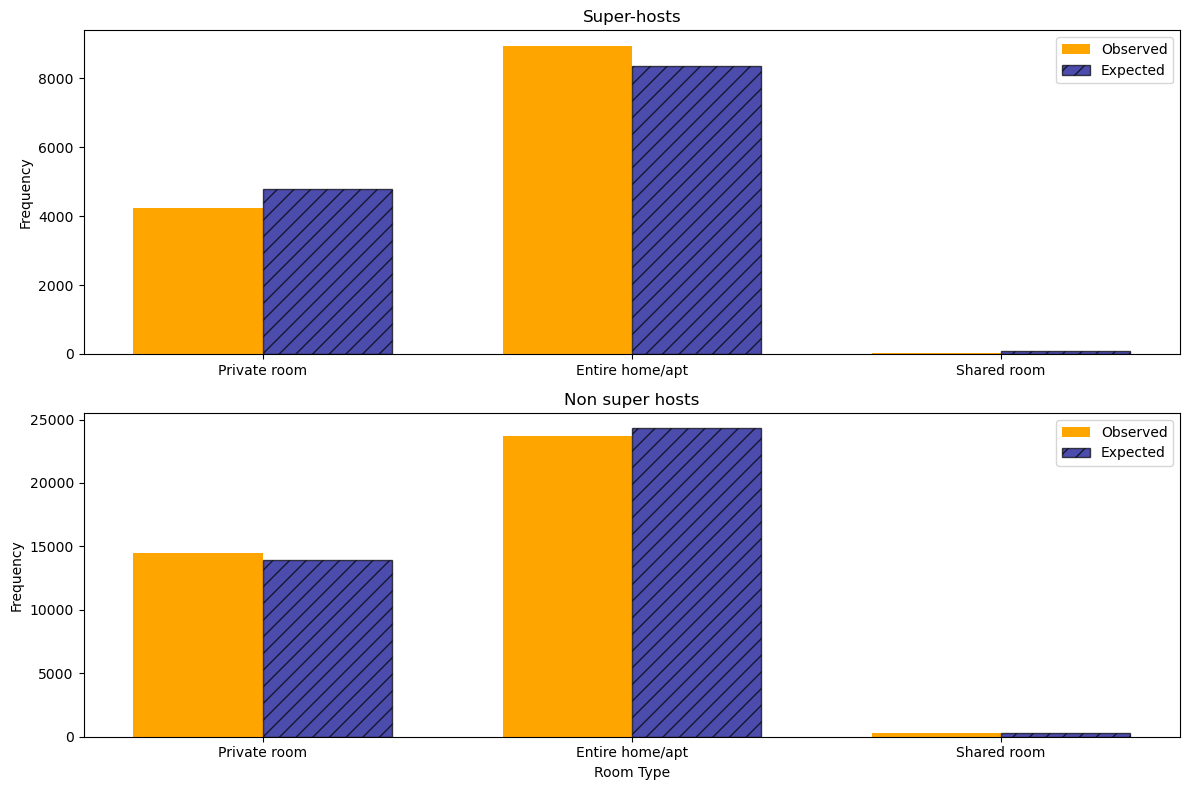

In [7]:
# Table of observed and expected frequencies
observed = contingency_table
expected = pd.DataFrame(
    expected, 
    index=contingency_table.index, 
    columns=contingency_table.columns
)

# Column positions
x = np.arange(len(observed.index))
bar_width = 0.35  # Column width

# Visualization
fig, axes = plt.subplots(2, 1, figsize=(12, 8))  # Two subplots vertically

# Subplot for super hosts
axes[0].bar(
    x - bar_width / 2,
    observed[1],
    bar_width,
    label='Observed',
    color='orange',
)
axes[0].bar(
    x + bar_width / 2,
    expected[1],
    bar_width,
    label='Expected',
    color='darkblue',
    edgecolor='black',
    hatch='//',
    alpha=0.7,
)
axes[0].set_title('Super-hosts')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(x)
axes[0].set_xticklabels(observed.index)
axes[0].legend()

# Subplot for non super hosts
axes[1].bar(
    x - bar_width / 2, 
    observed[0], 
    bar_width, 
    label='Observed', 
    color='orange'
)
axes[1].bar(
    x + bar_width / 2, 
    expected[0], 
    bar_width, 
    label='Expected', 
    color='darkblue', 
    edgecolor='black', 
    hatch='//', 
    alpha=0.7)
axes[1].set_title('Non super hosts')
axes[1].set_ylabel('Frequency')
axes[1].set_xlabel('Room Type')
axes[1].set_xticks(x)
axes[1].set_xticklabels(observed.index)
axes[1].legend()

# Show plot
plt.tight_layout()
plt.show();

<div style="color: #8B4513; font-weight: bold; font-size: 18px;">
Conclusion:</div>
<div style="color: #8B4513; font-size: 16px;">
Based on the conducted χ²-test and the contingency table analysis, we can conclude that there is a relationship between the type of accommodation (room_type) and the host’s status (host_is_superhost). Since the p-value is 4.62e-39, which is extremely small and much less than 0.05, we reject the null hypothesis of independence between the variables and confirm statistical significance. Regarding the observed and expected frequencies for the accommodation types, it is evident that super hosts tend to offer “Entire home/apartment” more frequently than expected, which likely contributes to their ratings and super host status. On the other hand, regular hosts tend to offer “Private room” more than expected, likely due to the availability and maintenance of such properties. “Shared room” is rarely offered by super hosts, even less frequently than expected. In my opinion, “Shared room” accommodations are generally preferred by budget tourists, and their high turnover can make it difficult to maintain the property in optimal condition. </div>

<div style="color: #8B4513; font-weight: bold; font-size: 18px;">Business Insights:</div>
<div style="color: #8B4513; font-size: 16px;">
    
1. Popularity of Entire Home/Apt among Super hosts:
- Super hosts likely focus more on offering comfortable, independent accommodations. This is supported by the fact that “Entire Home/Apt” is the most common type of property among super hosts.</div>
<div style="color: #8B4513; font-weight: bold; font-size: 16px;">
Recommendation: Airbnb could emphasize the expansion or optimization of “Entire Home/Apt” offerings for super hosts, as it aligns well with their status.</div>
<div style="color: #8B4513;font-size: 16px;">
    
2. Private Room is Less Popular Among Super hosts:
- “Private Room” is more frequently offered by non-super hosts. This may be due to lower investment or less effort required to maintain high quality for this type of accommodation.</div>
<div style="color: #8B4513; font-weight: bold; font-size: 16px;">
Recommendation: Airbnb could introduce support programs for hosts offering “Private Room” with a focus on improving service quality. This could help them achieve super host status.</div>

<div style="color: #8B4513; font-size: 16px;">
    
3. Shared Room is Almost Absent Among Super hosts:
- The low frequency of “Shared Room” offerings by super hosts might indicate low demand or the challenges of maintaining super host standards for this type of accommodation.</div>
<div style="color: #8B4513; font-weight: bold; font-size: 16px;">
Recommendation: Airbnb could reconsider its strategy regarding “Shared Room.” For example, they could create tools to increase the attractiveness of this accommodation type or develop special offers for hosts looking to improve service quality in this category. </div>

<div style="color: #8B4513; font-weight: bold; font-size: 16px;">
5. What types of accommodations are most frequently chosen by guests? </div>

In [10]:
# Calculate the frequency of selection for each room type
frequency_room_type = df['room_type'].value_counts()

# Calculate the percentage frequency for each room type
frequency_room_type_percentage = df['room_type'].value_counts(normalize=True) * 100

# Print the frequency of each room type
print(f'Frequency of selection of each room_type:\n{frequency_room_type}\n')

# Print the percentage frequency of each room type
print(f'Frequency of choice in percentage:\n{frequency_room_type_percentage}')

Frequency of selection of each room_type:
Entire home/apt    32648
Private room       18693
Shared room          366
Name: room_type, dtype: int64

Frequency of choice in percentage:
Entire home/apt    63.140387
Private room       36.151778
Shared room         0.707835
Name: room_type, dtype: float64


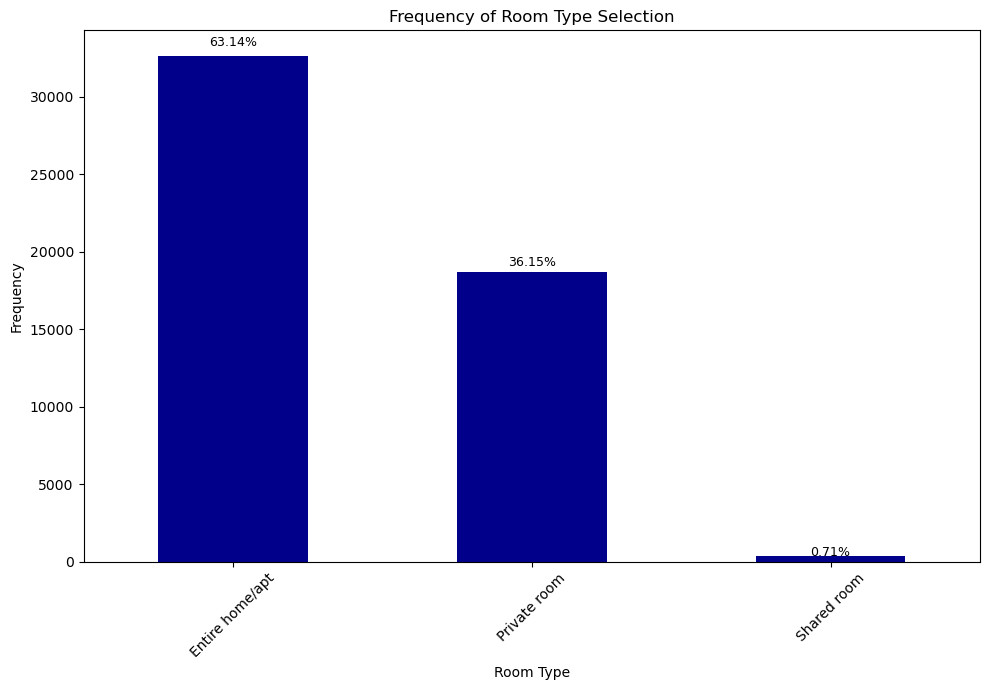

In [11]:
# Plot the frequency distribution of room type choices
plt.figure(figsize=(10, 7))
frequency_room_type.plot.bar(color='darkblue')
plt.title('Frequency of Room Type Selection')
plt.xlabel('Room Type')
plt.xticks(rotation=45)
plt.ylabel('Frequency')

# Add percentages on top of the bars
for i, value in enumerate(frequency_room_type):
    percent = f'{frequency_room_type_percentage.iloc[i]:.2f}%'  # Take percentage value for each bar
    plt.text(i, value + value * 0.02, percent, ha='center', fontsize=9, color='black')  # Text slightly above the bar

# Display the plot
plt.tight_layout()
plt.show();

<div style="color: #8B4513; font-weight: bold; font-size: 18px;">
Conclusion:</div>
<div style="color: #8B4513; font-size: 16px;">
The most popular type of accommodation is Entire Home/Apt, which accounts for the largest share of guest selections (63.14%). Shared Room is the least popular (0.71%), which may indicate low demand or specific market characteristics.</div>
<div style="color: #8B4513; font-weight: bold; font-size: 18px;">
Recommendations:</div>
<div style="color: #8B4513; font-size: 16px;">
Owners of Entire Home/Apt properties should focus on maintaining high quality and ratings of their accommodations to sustain their attractiveness to renters. To increase demand for Shared Room accommodations, special offers could be introduced, such as promotions like “Book 2 nights, get the 3rd night free,” to attract renters and generate demand in the budget accommodation segment.</div>

<div style="color: #8B4513; font-weight: bold; font-size: 18px;">
6. How do geographic factors (proximity to the city center, metro, attractions) influence the choice of accommodation? </div>

In [14]:
# Do Chi2 - analyze
# Create categories for various geographic and index-based columns
df['lng_category'] = pd.cut(
    df['lng'], 
    bins=4, 
    labels=['West', 'Mid-West', 'Mid-East', 'East']
)
df['lat_category'] = pd.cut(
    df['lat'], 
    bins=4, 
    labels=['South', 'Mid-South', 'Mid-North', 'North']
)
df['dist_category'] = pd.cut(
    df['dist'], 
    bins=[0, 2, 5, 10, np.inf], 
    labels=['Very Close', 'Close', 'Medium', 'Far']
)
df['metro_dist_category'] = pd.cut(
    df['metro_dist'], 
    bins=[0, 1, 3, 5, np.inf], 
    labels=['Very Close', 'Close', 'Medium', 'Far']
)
df['rest_index_norm_category'] = pd.qcut(
    df['rest_index_norm'], 
    q=4, 
    labels=['Very Close', 'Close', 'Medium', 'Far']   # Divide by quartiles
)  
df['attr_index_norm_category'] = pd.qcut(
    df['attr_index_norm'], 
    q=4, 
    labels=['Very Close', 'Close', 'Medium', 'Far']  # Divide by quartiles
)

# Apply function to every specific columns in df
col2 = ['dist', 'metro_dist', 'lng', 'lat', 'rest_index_norm', 'attr_index_norm']
for col in col2:
    chi2, p_value, dof, expected_df, contingency_table = cross_table(df, 'room_type', col)
    
    # Print results
    print(f'\nContingency table for room_type and {col}:')
    print('Chi2 Statistic:', chi2)
    print('p-value:', p_value)
    print('Degrees of Freedom:', dof)


Contingency table for room_type and dist:
Chi2 Statistic: 103414.0
p-value: 0.49766076626414846
Degrees of Freedom: 103412

Contingency table for room_type and metro_dist:
Chi2 Statistic: 103413.99999999997
p-value: 0.497660766264174
Degrees of Freedom: 103412

Contingency table for room_type and lng:
Chi2 Statistic: 82439.90916078979
p-value: 0.0
Degrees of Freedom: 47198

Contingency table for room_type and lat:
Chi2 Statistic: 79307.16153240643
p-value: 0.0
Degrees of Freedom: 42966

Contingency table for room_type and rest_index_norm:
Chi2 Statistic: 103392.46805431097
p-value: 0.4832174400023197
Degrees of Freedom: 103374

Contingency table for room_type and attr_index_norm:
Chi2 Statistic: 103400.08035834244
p-value: 0.4765480642166391
Degrees of Freedom: 103374


<div style="color: #8B4513; font-weight: bold; font-size: 16px;">
Since statistical significance is confirmed only for the latitude and longitude indicators (lat and lng), and their high Chi2 statistics (82439.91 for lng and 79307.16 for lat) indicate that observed frequencies significantly differ from expected ones, this highlights the importance of geographical factors in the choice of housing type. Further analysis will be conducted for these indicators. </div>

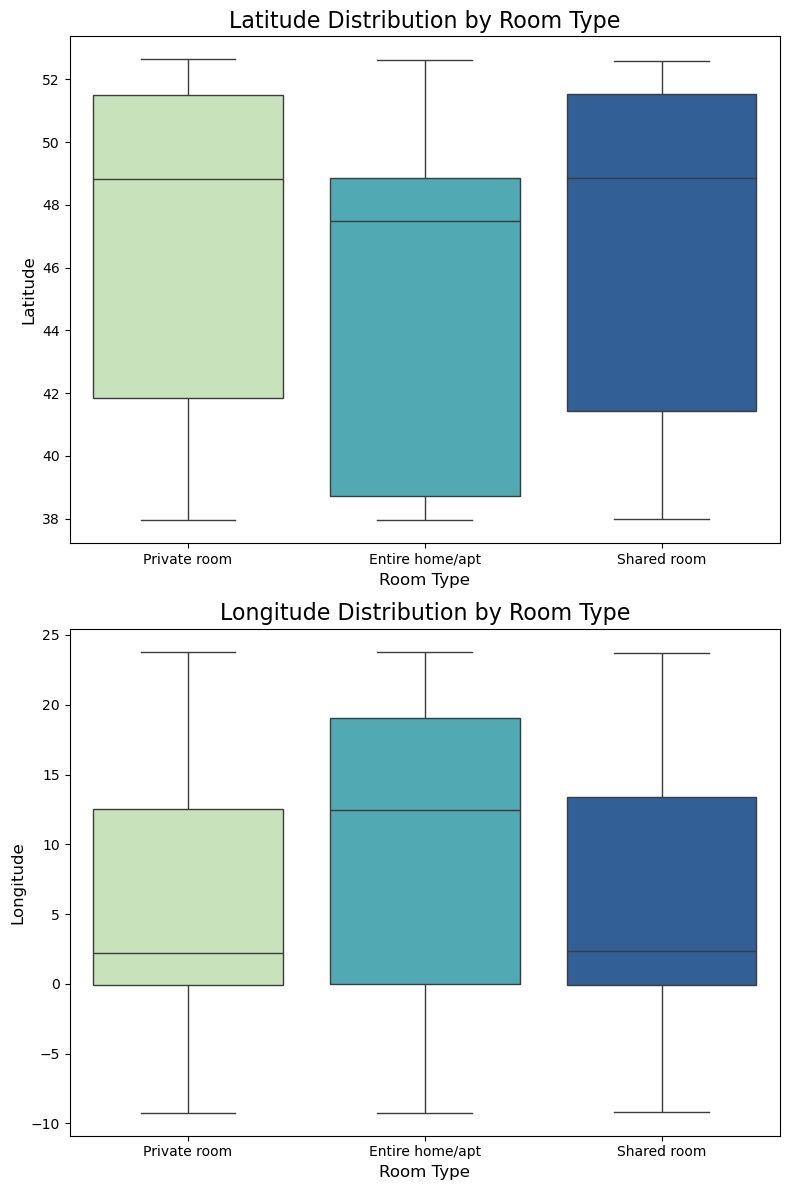

In [16]:
# Build visualization for latitude and longitude indicators
fig, axes = plt.subplots(2, 1, figsize=(8, 12))

# Boxplot for latitude
sns.boxplot(data=df, x='room_type', y='lat', palette='YlGnBu', ax=axes[0])
axes[0].set_xlabel('Room Type', fontsize=12)
axes[0].set_ylabel('Latitude', fontsize=12)

# Boxplot for longitude
sns.boxplot(data=df, x='room_type', y='lng', palette='YlGnBu', ax=axes[1])
axes[1].set_xlabel('Room Type', fontsize=12)
axes[1].set_ylabel('Longitude', fontsize=12)

# Set titles
axes[0].set_title('Latitude Distribution by Room Type', fontsize=16)
axes[1].set_title('Longitude Distribution by Room Type', fontsize=16)

plt.tight_layout()
plt.show();

<div style="color: #8B4513; font-weight: bold; font-size: 16px;">
The latitude distribution for Private room and Shared room ranges from 41 to 51, with an average of 49, while the range for Entire home/apartment is between 39 and 49, with an average of 47.5. In terms of longitude, Entire home/apartment has a larger spread compared to the other room types, ranging from 0 to 19, with an average of 12.5. On the other hand, Private room and Shared room have average longitudes of 2 to 2.5, and their range is one-third smaller.

From this, we can conclude that when choosing accommodation types, there is more leniency towards geographical factors for Entire home/apartment. I might assume that this is related to the income level of the renters, and they are less concerned about geographical location, as they can use taxis or rental cars to travel from point A to point B. However, renters of Private room and Shared room are more likely to impose specific geographical location restrictions on their future rental accommodation, likely due to the convenience of access to certain landmarks. These renters may have a lower budget and rely more on public transportation or walking distance.
</div>

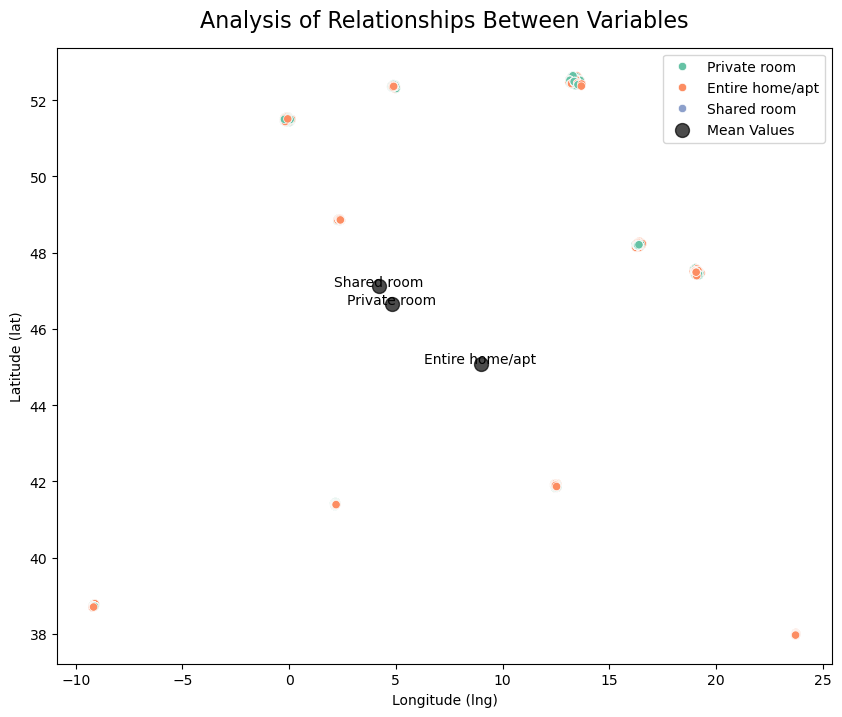

In [18]:
# Calculate the mean values
mean_values = df.groupby('room_type')[['lng', 'lat']].mean().reset_index()

plt.figure(figsize=(10, 8))

# Create the main scatter plot
sns.scatterplot(data=df, x='lng', y='lat', hue='room_type', palette='Set2')

# Add mean values
plt.scatter(
    mean_values['lng'], 
    mean_values['lat'], 
    color='black', 
    s=100, 
    label='Mean Values', 
    zorder=10, 
    alpha=0.7
)

# Add text with room type names
for i, row in mean_values.iterrows():
    plt.text(row['lng'], row['lat'], row['room_type'], fontsize=10, ha='center', color='black')

# Set plot title and labels
plt.title('Analysis of Relationships Between Variables', y=1.02, fontsize=16)
plt.xlabel('Longitude (lng)')
plt.ylabel('Latitude (lat)')
plt.legend()
plt.show();

<div style="color: #8B4513; font-weight: bold; font-size: 16px;">
Conclusion: </div>
<div style="color: #8B4513; font-size: 16px;">
Most of the rental choices are concentrated in latitudes from 0 to 15 and longitudes from 46 to 55, which corresponds to the majority of large cities in Europe present in the sample. This indicates that renters prefer central or well-located areas. The average values for rental choices are as follows:

- Entire room/apart: Latitude 9, Longitude 45. This suggests that this type of accommodation is located in moderately distant areas from the city center.
- Private room: Latitude 5.2, Longitude 47.
- Shared room: Latitude 4.9, Longitude 47.5.

Private room and Shared room are more often rented in more central or densely populated areas. This additional analysis confirms the previous conclusion. </div>
<div style="color: #8B4513; font-weight: bold; font-size: 16px;">
Possible recommendations:</div>
<div style="color: #8B4513; font-size: 16px;">
    
-  If the goal is to attract renters for Entire room/apart, consider expanding the offering in more central areas, as renters of Private room and Shared room prefer such regions.
- For Private room and Shared room owners, it’s important to maintain housing availability in central areas or areas with good public transportation connections. </div>